# Packages

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Importing Data

In [18]:
titanic_data = pd.read_csv("/Users/gangasingh/Downloads/titanic/train.csv")
test = pd.read_csv("/Users/gangasingh/Downloads/titanic/test.csv")
test_ids = test['PassengerId']
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [19]:
titanic_data.shape

(891, 12)

In [20]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# No of missing values in each column

In [21]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Handling missing values

In [22]:
titanic_data = titanic_data.drop(columns='Cabin', axis=1)

In [23]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [24]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [25]:
titanic_data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [26]:
titanic_data['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [27]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

# EDA

In [28]:
titanic_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

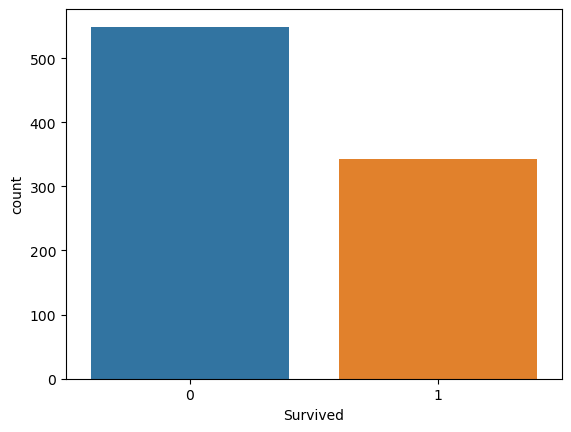

In [29]:
sns.countplot(x='Survived', data=titanic_data)

<Axes: xlabel='Sex', ylabel='count'>

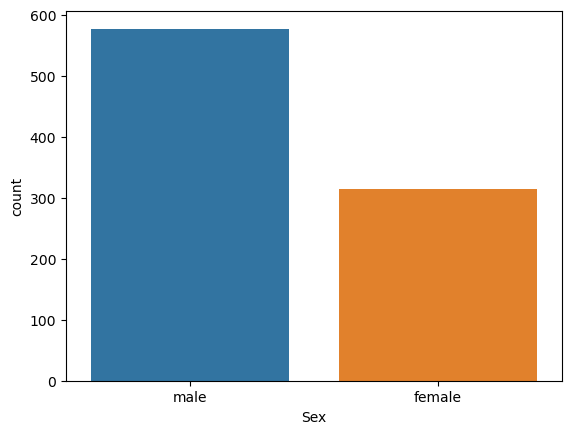

In [30]:
sns.countplot(x='Sex', data=titanic_data)

AttributeError: 'numpy.int64' object has no attribute 'startswith'

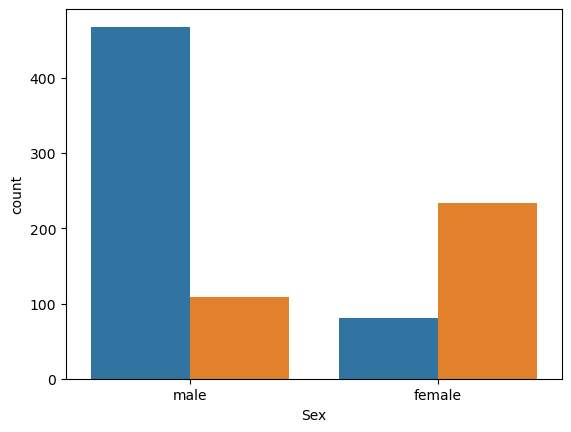

In [31]:
sns.countplot(x='Sex', hue='Survived', data=titanic_data)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 18.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 8.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 26.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 14.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


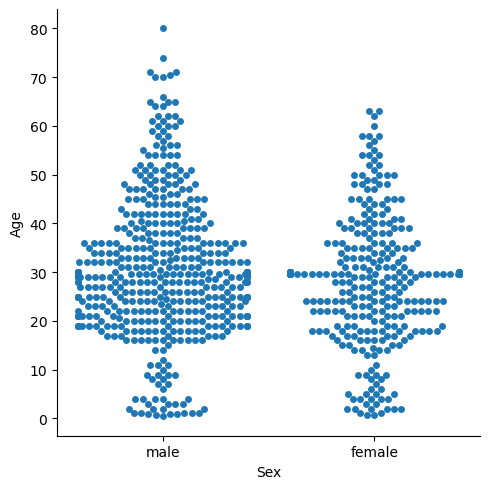

In [32]:
sns.catplot(x='Sex', y='Age', kind='swarm', data=titanic_data)

AttributeError: 'numpy.int64' object has no attribute 'startswith'

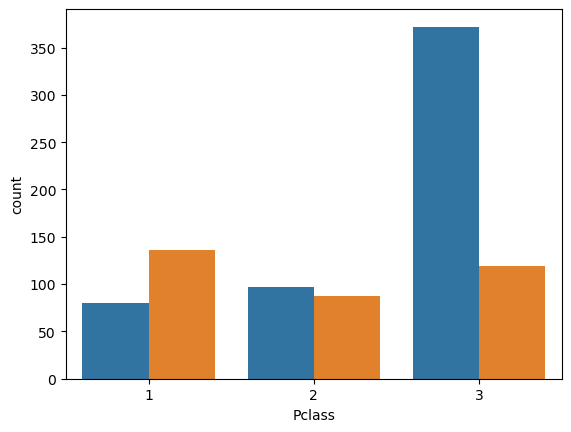

In [33]:
sns.countplot(x='Pclass', hue='Survived', data=titanic_data)

In [34]:
numeric_features = titanic_data.select_dtypes(include=[np.number])
numeric_features.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [35]:
categorical_features = titanic_data.select_dtypes(include=[object])
categorical_features.columns

Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')

# Correlation

In [38]:
titanic_data.drop(columns=['Ticket'], inplace=True)

KeyError: "['Ticket'] not found in axis"

In [43]:
titanic_data.drop(columns=['PassengerId', 'Name'], axis=1, inplace=True)

In [45]:
titanic_data['Sex'] = titanic_data['Sex'].replace({'male': 0, 'female': 1})
titanic_data['Embarked'] = titanic_data['Embarked'].replace({'S': 0, 'C':1, 'Q':2})

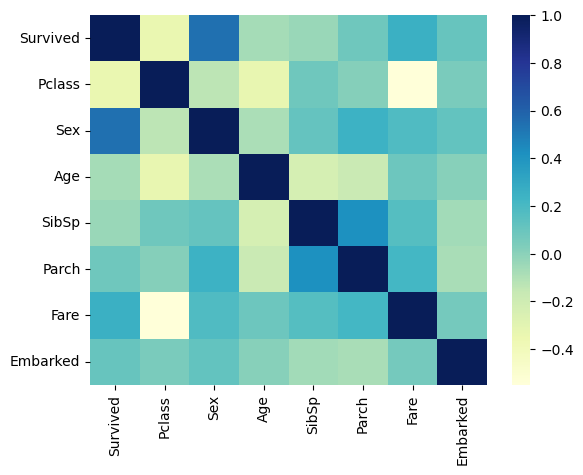

In [46]:
sns.heatmap(titanic_data.corr(), cmap="YlGnBu")
plt.show()

# Encoding the categorical columns

In [48]:
X = titanic_data.drop(columns=['Survived'], axis=1)
Y = titanic_data['Survived']

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=2)

In [50]:
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (712, 7) (179, 7)


# Model Training

In [51]:
clf = LogisticRegression(random_state=0, max_iter=1000).fit(X_train, Y_train)

In [52]:
predictions=clf.predict(X_test)
accuracy_score(Y_test, predictions)

0.7821229050279329

In [53]:
test = pd.read_csv("/Users/gangasingh/Downloads/titanic/test.csv")

In [54]:
test.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [55]:
test['Age'] = test['Age'].fillna(test['Age'].mean())

In [56]:
test['Sex'] = test['Sex'].replace({'male': 0, 'female': 1})

In [57]:
test['Embarked'] = test['Embarked'].replace({'S': 0, 'C':1, 'Q':2})

In [58]:
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

In [70]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


In [59]:
submission_preds = clf.predict(test)

In [72]:
df = pd.DataFrame({
    "PassengerId": test_ids.values,
    "Survived": submission_preds
})


In [73]:
df.to_csv("/Users/gangasingh/Downloads/submission.csv", index=False)